In [712]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import seaborn as sns

In [589]:
data=pd.read_csv('E://Astro/2018 season/2018 season pitch log.csv')
dates=data['Date'].unique()
data['Date']=pd.to_datetime(data['Date'])
data['Date']=data['Date'].dt.date
data['whistle']=pd.to_numeric(data['whistle'])

#create labels
data_labels=data[~data.duplicated(subset=['Date'],keep='first')]

xlabels=[]

for i,row in data_labels.iterrows():
    xlabels.append(f"{row[1].strftime('%m-%d')} : {row[2]}")

In [590]:
total_pitches=data['Date'].value_counts(ascending=True)
total_pitches=total_pitches.reset_index()
tp=total_pitches.rename(columns={'index':'Date','Date':'count'})
tp['Date']=pd.to_datetime(tp['Date'])
tp = tp.sort_values(by='Date')

In [591]:
date_whistles = data.groupby(by='Date').sum()
date_whistles.reset_index(inplace=True)

In [592]:
#error
sum(date_whistles['whistle'][61:65])/4

8.75

In [593]:
sum(date_whistles['whistle'])/len(date_whistles['whistle'])

19.523076923076925

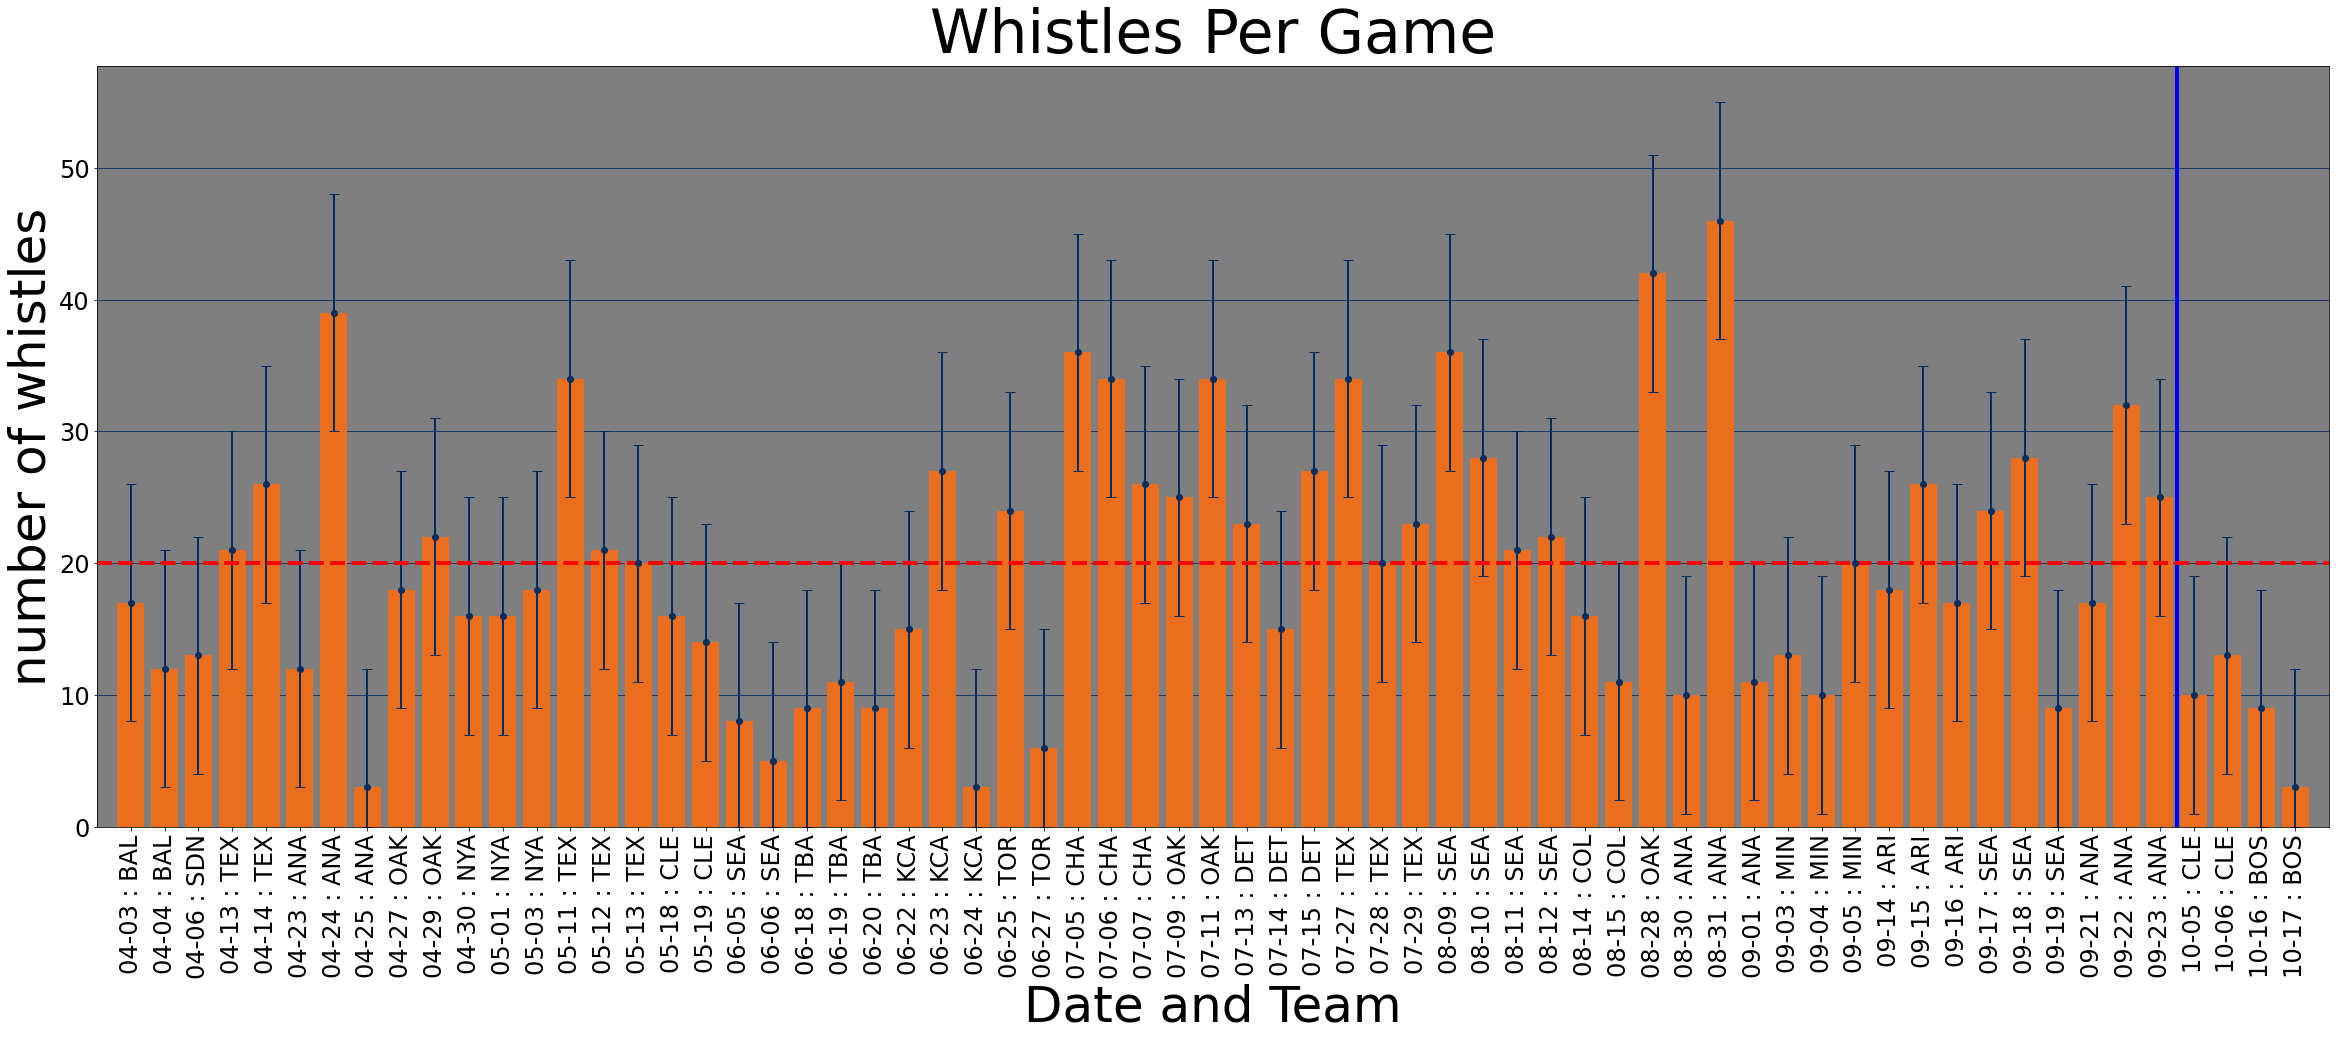

In [713]:


plt.rcParams.update({'font.size': 24})

fig=plt.figure(figsize=(40,14))
ax=fig.add_subplot(111)
plt.bar(range(65),date_whistles['whistle'],color=(235/255,110/255,31/255,1),width=.8)
ylower=np.maximum(.01,date_whistles['whistle']-9)
yerr_lower=date_whistles['whistle']-ylower
yerr_upper=[9]*len(range(65))
plt.errorbar(range(65),date_whistles['whistle'],yerr=[yerr_lower,yerr_upper],fmt='o',lw=2,capsize=5,color=(0,45/255,98/255,1))
plt.axvline(x=60.5,color='b',linewidth=4)
#plt.axhline(y=9,color='black',ls='--',linewidth=4)
plt.axhline(y=20,color='r',ls='--',linewidth=4)
plt.xticks(range(len(date_whistles['Date'])),date_whistles['Date'])

ax.set_xticklabels(xlabels,rotation=90)
ax.set_axisbelow(True)
ax.yaxis.grid(color=(0,45/255,98/255,1))
ax.set_xlabel('Date and Team',fontsize=50)
ax.set_ylabel('number of whistles',fontsize=50)
ax.set_title('Whistles Per Game',fontsize=60)
ax.set_xlim(-1,65)
ax.set_facecolor('tab:gray')

plt.show()

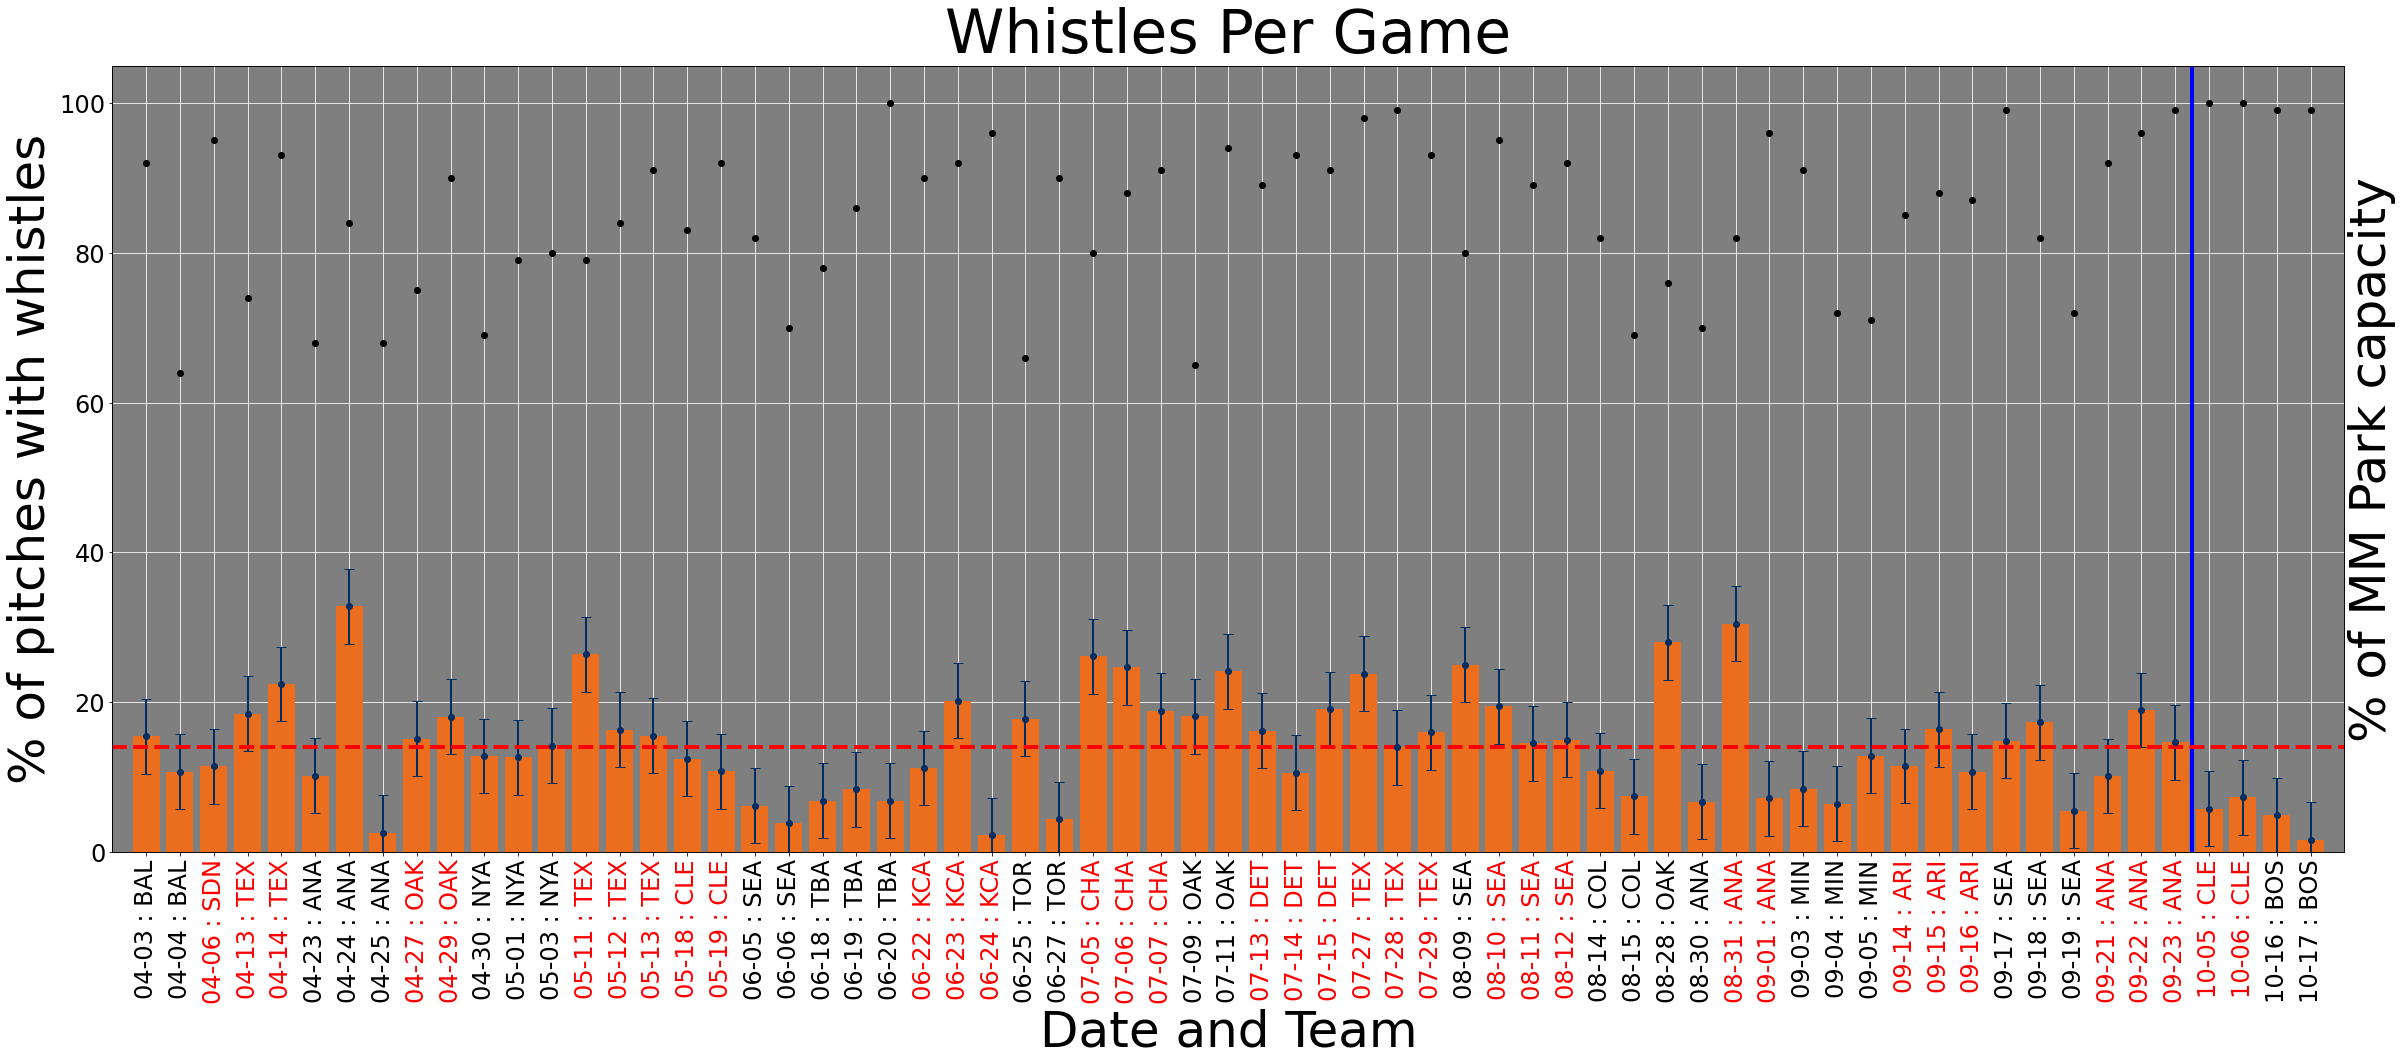

In [714]:
scaled_whistle=date_whistles['whistle']/tp['count']*100

percent_avg=sum(scaled_whistle)/len(scaled_whistle)

#error
sum(scaled_whistle[61:65])/4

#calculate crowd capacity
#crowd=round(data_labels['Attendance']/int(data_labels['Attendance'].max())*100,0)

plt.rcParams.update({'font.size': 24})

fig=plt.figure(figsize=(40,14))
ax=fig.add_subplot(111)

plt.bar(range(len(scaled_whistle)),scaled_whistle,color=(235/255,110/255,31/255,1),width=.8)

ylower=np.maximum(.01,scaled_whistle-5)
yerr_lower=scaled_whistle-ylower
yerr_upper=[5]*len(scaled_whistle)
plt.errorbar(range(len(scaled_whistle)),scaled_whistle,yerr=[yerr_lower,yerr_upper],fmt='o',lw=2,capsize=5,color=(0,45/255,98/255,1))

plt.plot(range(len(scaled_whistle)),crowd,'ko')

plt.axvline(x=60.5,color='b',linewidth=4)
plt.axhline(y=percent_avg,color='r',ls='--',linewidth=4)

plt.xticks(range(len(date_whistles['Date'])),date_whistles['Date'])

#x-axis


ax.set_xticklabels(xlabels,rotation=90)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(),data_labels['Weekend']):
    if tickcolor==0:
        ticklabel.set_color('k')
    elif tickcolor==1:
        ticklabel.set_color('r')

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='w')
ax.xaxis.grid(color='w')

ax.set_xlabel('Date and Team',fontsize=50)
ax.set_ylabel('% of pitches with whistles',fontsize=50)
ax.set_title('Whistles Per Game',fontsize=60)
ax.set_xlim(-1,65)
ax.set_facecolor('tab:gray')

ax2=ax.twinx()
ax2.set_ylabel('% of MM Park capacity',fontsize=50)
ax2.set_yticks([])
fig.subplots_adjust(bottom=0.1)
plt.show()

In [378]:
# average whistles during week
round(data[data['Weekend']==0].groupby(by='Date').sum()['whistle'].sum()/len(data[data['Weekend']==0].groupby(by='Date').sum()['whistle']),0)

16.0

In [379]:
# average whistles during weekend
round(data[data['Weekend']==1].groupby(by='Date').sum()['whistle'].sum()/len(data[data['Weekend']==0].groupby(by='Date').sum()['whistle']),0)

25.0

on average 9 more whistles during weekends!

In [391]:
#covariance
np.corrcoef(crowd,scaled_whistle)

array([[1.        , 0.00141576],
       [0.00141576, 1.        ]])

.001 normalized correlation. as crowd increases heard whistles increases but very weakly.

In [596]:
pwips=data[data['type']=='pwip'].groupby(by='Date').count().reset_index()
pwips=pwips[pwips.columns[0:2]].rename(columns={'Date':'Date','Game':'pwip'})

charges=data[data['type']=='charge'].groupby(by='Date').count().reset_index()
charges=charges[charges.columns[0:2]].rename(columns={'Date':'Date','Game':'charge'})

whistles=pd.merge(pwips, charges,  how='left', left_on='Date', right_on = 'Date').fillna(0)

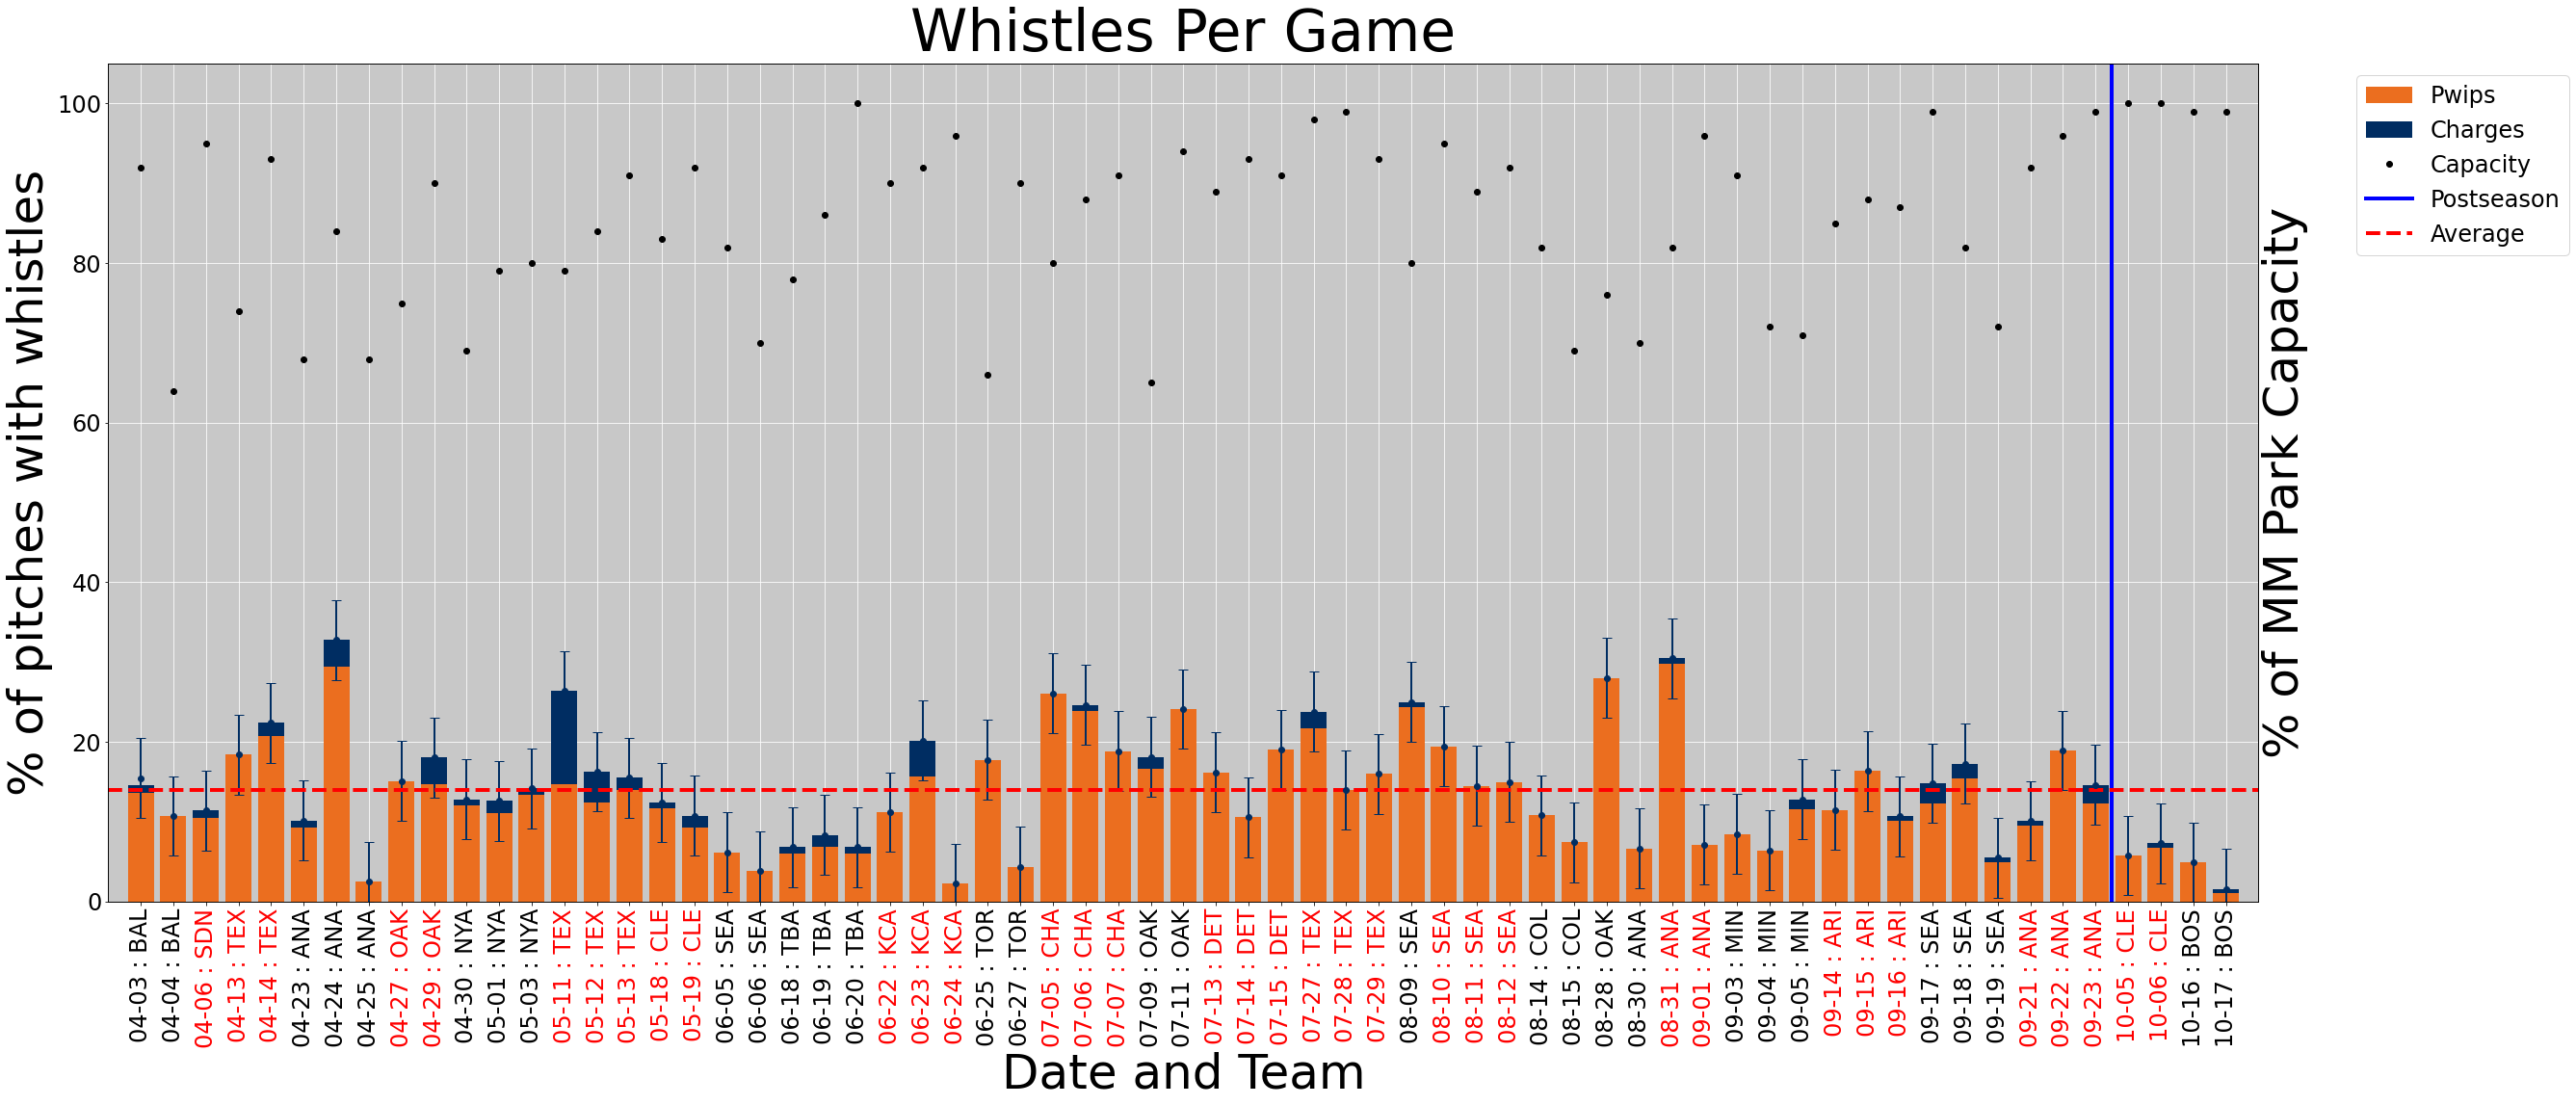

In [599]:
scaled_whistle=date_whistles['whistle']/tp['count']*100
scaled_pwips = whistles['pwip']/tp['count']*100
scaled_charges = whistles['charge']/tp['count']*100
percent_avg=sum(scaled_whistle)/len(scaled_whistle)

#error
sum(scaled_whistle[61:65])/4

#calculate crowd capacity
#crowd=round(data_labels['Attendance']/int(data_labels['Attendance'].max())*100,0)

plt.rcParams.update({'font.size': 24})

fig=plt.figure(figsize=(40,16))
ax=fig.add_subplot(111)

p1=plt.bar(range(len(scaled_whistle)),scaled_pwips,color=(235/255,110/255,31/255,1),width=.8)
p2=plt.bar(range(len(scaled_whistle)),scaled_charges,color=(0,45/255,98/255,1),width=.8,bottom=scaled_pwips)

ylower=np.maximum(.01,scaled_whistle-5)
yerr_lower=scaled_whistle-ylower
yerr_upper=[5]*len(scaled_whistle)
plt.errorbar(range(len(scaled_whistle)),scaled_whistle,yerr=[yerr_lower,yerr_upper],fmt='o',lw=2,capsize=5,color=(0,45/255,98/255,1))

p3, =plt.plot(range(len(scaled_whistle)),crowd,'ko')

p4=plt.axvline(x=60.5,color='b',linewidth=4)
p5=plt.axhline(y=percent_avg,color='r',ls='--',linewidth=4)

#x-axis
plt.xticks(range(len(date_whistles['Date'])),date_whistles['Date'])
ax.set_xticklabels(xlabels,rotation=90)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(),data_labels['Weekend']):
    if tickcolor==0:
        ticklabel.set_color('k')
    elif tickcolor==1:
        ticklabel.set_color('r')

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='w')
ax.xaxis.grid(color='w')

ax.set_xlabel('Date and Team',fontsize=50)
ax.set_ylabel('% of pitches with whistles',fontsize=50)
ax.set_title('Whistles Per Game',fontsize=60)
ax.set_xlim(-1,65)
ax.set_facecolor((200/255,200/255,200/255,1))

ax2=ax.twinx()
ax2.set_ylabel('% of MM Park Capacity',fontsize=50)
ax2.set_yticks([])

ax.legend((p1, p2, p3, p4, p5), ('Pwips', 'Charges','Capacity','Postseason','Average'),bbox_to_anchor=(1.15,1.0))

plt.show()

fig.savefig('E://Astro/2018 season/Whistles_Game.tif',dpi=150,bbox_inches='tight')

In [564]:
pitches=['Four-Seam Fastball','Two-Seam Fastball','Cutter','Sinker','Splitter','Forkball','Changeup','Curveball','Slider','Knuckle Curve','Eephus','Screwball','Knuckleball','Pitchout']
FSF=data[data['pitch_type']==pitches[0]].groupby(by='type').count().reset_index()
FSF=FSF[FSF.columns[0:2]].rename(columns={'type':'type','Game':pitches[0]})

n=1
while n < len(pitches):
    print(pitches[n])
    ptype=data[data['pitch_type']==pitches[n]].groupby(by='type').count().reset_index()
    ptype=ptype[ptype.columns[0:2]].rename(columns={'type':'type','Game':pitches[n]})
    FSF=pd.merge(FSF, ptype,  how='left', left_on='type', right_on = 'type').fillna(0)
    n+=1
p=FSF
p.set_index('type',inplace=True)

Two-Seam Fastball
Cutter
Sinker
Splitter
Forkball
Changeup
Curveball
Slider
Knuckle Curve
Eephus
Screwball
Knuckleball
Pitchout


In [610]:
percent=[]
for i,col in p.iteritems():
    x=(col[2]/(col[0]+col[1]+col[2]))
    if x != type(float):
        print(x)

0.1552259399793032
0.15142857142857144
0.125
0.13797634691195795
0.11242603550295859
0.0
0.11099585062240663
0.0793010752688172
0.10577547047371837
0.09717868338557993
0.4
nan
nan
0.5


C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [611]:
pwip_percent=[15.52,15.14,12.50,13.79,11.12,0,11.10,7.93,10.57,9.71,40,0,0,50]

In [614]:
p.loc[3]=pwip_percent

In [671]:
p=p.T

type,charge,no,pwip,3
Four-Seam Fastball,16.0,2433.0,450.0,15.52
Two-Seam Fastball,5.0,886.0,159.0,15.14
Cutter,9.0,649.0,94.0,12.50
Sinker,3.0,653.0,105.0,13.79
Splitter,1.0,149.0,19.0,11.12
Forkball,0.0,2.0,0.0,0.00
Changeup,12.0,845.0,107.0,11.10
Curveball,17.0,668.0,59.0,7.93
Slider,14.0,1364.0,163.0,10.57
Knuckle Curve,1.0,287.0,31.0,9.71


In [674]:
p=p.rename(columns={3:'percent'})

In [675]:
p=p.sort_values(by='percent',ascending=False)

In [702]:
pitchlabels=p_2.index.values.tolist()

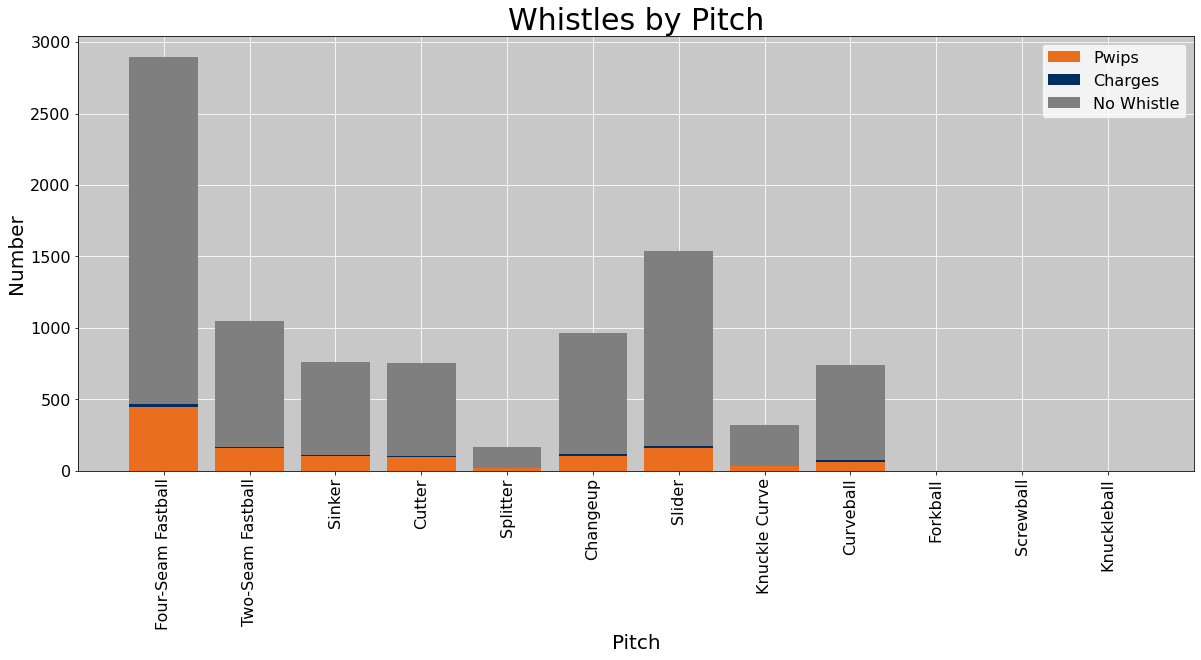

In [715]:
plt.rcParams.update({'font.size': 16})

fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)

p1=plt.bar(range(len(p_2)),p_2['pwip'],color=(235/255,110/255,31/255,1),width=.8)
p2=plt.bar(range(len(p_2)),p_2['charge'],color=(0,45/255,98/255,1),width=.8,bottom=p_2['pwip'])
p3=plt.bar(range(len(p_2)),p_2['no'],color='tab:gray',width=.8,bottom=(p_2['charge']+p_2['pwip']))
plt.xticks(range(len(p_2)),pitchlabels)
ax.set_xticklabels(pitchlabels,rotation=90)

ax.set_axisbelow(True)
ax.yaxis.grid(color='w')
ax.xaxis.grid(color='w')

ax.set_xlabel('Pitch',fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.set_title('Whistles by Pitch',fontsize=30)
ax.set_xlim(-1,12)
ax.set_facecolor((200/255,200/255,200/255,1))

ax.legend((p1, p2, p3), ('Pwips', 'Charges','No Whistle'))

plt.show()
p.to_csv('E://Astro/2018 season/Whistles_pitch.csv')
#fig.savefig('E://Astro/2018 season/Whistles_pitch.tif',dpi=150,bbox_inches='tight')

In [626]:
batter_whistle=data[data['whistle']==1].groupby(by='batter').count()
batter_whistle=batter_whistle[batter_whistle.columns[0:1]].rename(columns={'Game':'whistle'})

In [632]:
data['batter'].value_counts()

Bregman       1118
Springer       950
Gonzalez       885
Altuve         848
Gurriel        848
Reddick        813
Correa         774
Gattis         611
White          484
Kemp           426
McCann         330
Stassi         290
Marisnick      235
Maldonado      172
Tucker         137
Fisher         122
Federowicz      88
Davis           73
Straw            4
Name: batter, dtype: int64

In [633]:
batter_total=[848,1118,774,73,88,122,611,885,848,426,172,235,330,813,950,290,4,137,484]
batter_whistle['total']=batter_total

In [640]:
ratio=[]
for i,row in batter_whistle.iterrows():
    ratio.append(round(row[0]/row[1]*100,2))
batter_whistle['ratio']=ratio

In [660]:
batter_whistle=batter_whistle.sort_values(by='whistle',ascending=False)

In [662]:
batterlabels=batter_whistle.index.values.tolist()

In [793]:
batter_whistle=pd.read_csv('E://Astro/2018 season/extracted datasets/Whistles_batter.csv')

In [794]:
batter_whistle

,batter,whistle,total,ratio
0,Bregman,161,1118,14.40
1,Gonzalez,143,885,16.16
2,Correa,122,774,15.76
3,Springer,120,950,12.63
4,Gurriel,120,848,14.15
5,Altuve,119,848,14.03
6,Reddick,107,813,13.16
7,Gattis,82,611,13.42
8,White,61,484,12.60
9,Kemp,52,426,12.21


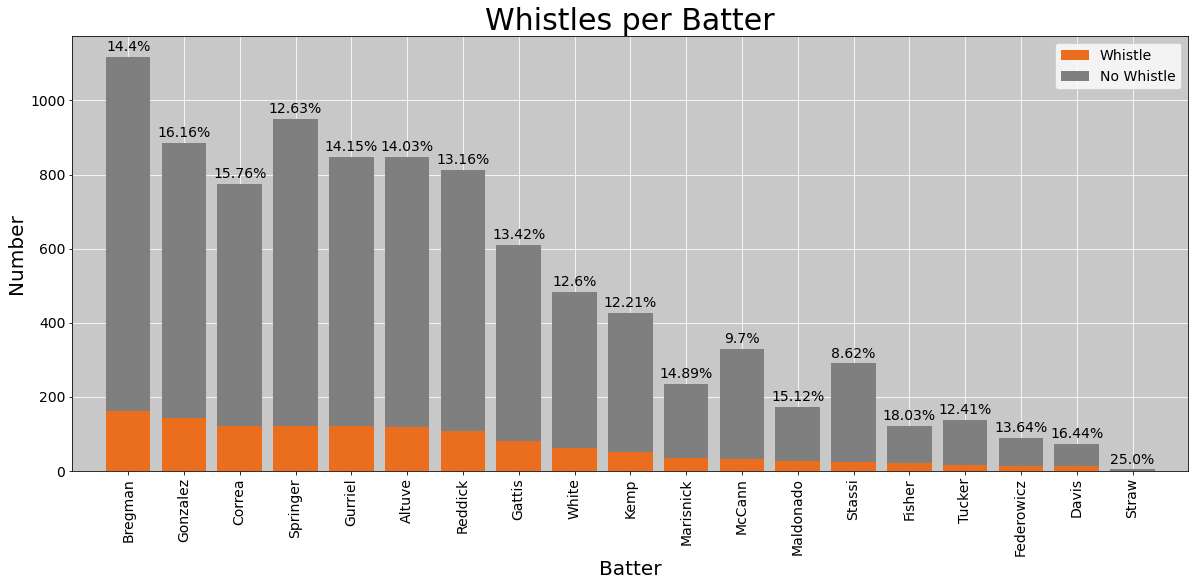

In [803]:
plt.rcParams.update({'font.size': 14})

fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)

p1=plt.bar(range(len(batter_whistle)),batter_whistle['whistle'],color=(235/255,110/255,31/255,1),width=.8)
p2=plt.bar(range(len(batter_whistle)),(batter_whistle['total']-batter_whistle['whistle']),color='tab:gray',width=.8,bottom=batter_whistle['whistle'])
plt.xticks(range(len(batter_whistle)),batterlabels)
ax.set_xticklabels(batterlabels,rotation=90)

ax.set_axisbelow(True)
ax.yaxis.grid(color='w')
ax.xaxis.grid(color='w')

ax.set_xlabel('Batter',fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.set_title('Whistles per Batter',fontsize=30)
ax.set_xlim(-1,19)
ax.set_facecolor((200/255,200/255,200/255,1))

ax.legend((p1, p2), ('Whistle','No Whistle'))

for rect1,rect2,text in zip(p1,p2,batter_whistle['ratio']):
    height = rect1.get_height()+rect2.get_height()
    ax.annotate(f'{text}%',
                xy=(rect1.get_x() + rect1.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

batter_whistle.to_csv('E://Astro/2018 season/Whistles_batter.csv')

fig.savefig('E://Astro/2018 season/Whistles_batter.tif',dpi=150,bbox_inches='tight')

In [716]:
data.head()

,Game,Date,Opponent,Weekend,Attendance,Hou_Score,Opp_Score,Win,game_pitch,pitcher,...,time,adjusted,start,youtube_timestamp,game_url,timestamp,pitch_url,whistle,type,notes
0,6,2018-04-03,BAL,0,"40,081",10,6,1,16,Wright,...,1224.0,1224,1204,0:20:24,https://www.youtube.com/watch?v=M5mtji_TSA4,https://www.youtube.com/watch?v=M5mtji_TSA4&t=...,https://baseballsavant.mlb.com/gamefeed?game_p...,0,no,indistinct whistle
1,6,2018-04-03,BAL,0,"40,081",10,6,1,17,Wright,...,1240.0,1240,1220,0:20:40,https://www.youtube.com/watch?v=M5mtji_TSA4,https://www.youtube.com/watch?v=M5mtji_TSA4&t=...,https://baseballsavant.mlb.com/gamefeed?game_p...,0,no,NaN
2,6,2018-04-03,BAL,0,"40,081",10,6,1,999,Wright,...,1255.0,1255,1235,0:20:55,https://www.youtube.com/watch?v=M5mtji_TSA5,https://www.youtube.com/watch?v=M5mtji_TSA5&t=...,https://baseballsavant.mlb.com/gamefeed?game_p...,0,no,NaN
3,6,2018-04-03,BAL,0,"40,081",10,6,1,18,Wright,...,1274.0,1274,1254,0:21:14,https://www.youtube.com/watch?v=M5mtji_TSA4,https://www.youtube.com/watch?v=M5mtji_TSA4&t=...,https://baseballsavant.mlb.com/gamefeed?game_p...,0,no,pwip before signs
4,6,2018-04-03,BAL,0,"40,081",10,6,1,19,Wright,...,1303.0,1303,1283,0:21:43,https://www.youtube.com/watch?v=M5mtji_TSA4,https://www.youtube.com/watch?v=M5mtji_TSA4&t=...,https://baseballsavant.mlb.com/gamefeed?game_p...,0,no,held whistle


In [742]:
empty=data[(data['on_first']==0) & (data['on_second']==0) & (data['on_third']==0)].groupby(by='whistle').count()
empty=empty[empty.columns[0:1]].rename(columns={'Game':'Empty'})

first=data[(data['on_first']==1) & (data['on_second']==0) & (data['on_third']==0)].groupby(by='whistle').count()
first=first[first.columns[0:1]].rename(columns={'Game':'First'})

second=data[(data['on_first']==0) & (data['on_second']==1) & (data['on_third']==0)].groupby(by='whistle').count()
second=second[second.columns[0:1]].rename(columns={'Game':'Second'})

third=data[(data['on_first']==0) & (data['on_second']==0) & (data['on_third']==1)].groupby(by='whistle').count()
third=third[third.columns[0:1]].rename(columns={'Game':'Third'})

fir_sec=data[(data['on_first']==1) & (data['on_second']==1) & (data['on_third']==0)].groupby(by='whistle').count()
fir_sec=fir_sec[fir_sec.columns[0:1]].rename(columns={'Game':'First_Second'})

fir_third=data[(data['on_first']==1) & (data['on_second']==0) & (data['on_third']==1)].groupby(by='whistle').count()
fir_third=fir_third[fir_third.columns[0:1]].rename(columns={'Game':'First_Third'})

sec_third=data[(data['on_first']==0) & (data['on_second']==1) & (data['on_third']==1)].groupby(by='whistle').count()
sec_third=sec_third[sec_third.columns[0:1]].rename(columns={'Game':'Second_Third'})

loaded=data[(data['on_first']==1) & (data['on_second']==1) & (data['on_third']==1)].groupby(by='whistle').count()
loaded=loaded[loaded.columns[0:1]].rename(columns={'Game':'Loaded'})

on_base=pd.merge(empty, first,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, second,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, third,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, fir_sec,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, fir_third,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, sec_third,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)
on_base=pd.merge(on_base, loaded,  how='left', left_on='whistle', right_on = 'whistle').fillna(0)

In [746]:
on_base=on_base.T

In [783]:
percent=[]
for i, row in on_base.iterrows():
    percent.append(round(row[1]/(row[0]+row[1])*100,2))
    
on_base['percent']=percent

In [784]:
on_base[0].sum()
#7939
on_base[1].sum()
#1269

1269

In [809]:
on_base

whistle,0,1,percent
Empty,4674,583,11.09
First,1593,293,15.54
Second,511,127,19.91
Third,121,35,22.44
First_Second,537,124,18.76
First_Third,197,41,17.23
Second_Third,138,31,18.34
Loaded,168,35,17.24


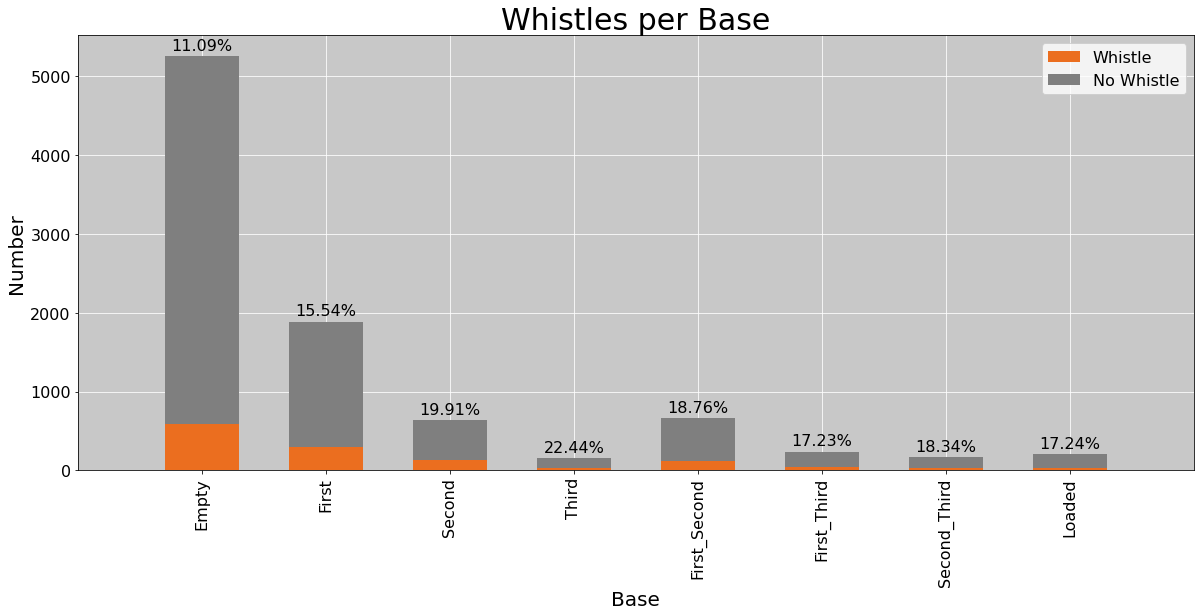

In [811]:
plt.rcParams.update({'font.size': 16})

fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)

p1=plt.bar(range(len(on_base)),on_base[1],color=(235/255,110/255,31/255,1),width=.6)
p2=plt.bar(range(len(on_base)),(on_base[0]),color='tab:gray',width=.6,bottom=on_base[1])
plt.xticks(range(len(on_base)),baselabels)
ax.set_xticklabels(baselabels,rotation=90)

ax.set_axisbelow(True)
ax.yaxis.grid(color='w')
ax.xaxis.grid(color='w')

ax.set_xlabel('Base',fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.set_title('Whistles per Base',fontsize=30)
ax.set_xlim(-1,8)
ax.set_facecolor((200/255,200/255,200/255,1))

for rect1,rect2,text in zip(p1,p2,on_base['percent']):
    height = rect1.get_height()+rect2.get_height()
    ax.annotate(f'{text}%',
                xy=(rect1.get_x() + rect1.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.legend((p1, p2), ('Whistle','No Whistle'))

on_base.to_csv('E://Astro/2018 season/Whistles_base.csv')

fig.savefig('E://Astro/2018 season/Whistles_base.tif',dpi=150,bbox_inches='tight')